In [1]:
!pip install tensorflow==2.4.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=76bfd7450ae717397abbb68f676f24a3b7eae4af7e0584d3baa50724038e3eed
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-win_amd64.whl size=38400 sha256=7a4d2f466195a01978440939e2de974b4cc5c3757f9d969b5687eee1496fe243
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built termcolor wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extens

You should consider upgrading via the 'c:\users\kaitl\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

from custom.iris_lm_depth import from_landmarks_to_depth
from videosource import FileSource, WebcamSource

In [3]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('eyes_feb28_30_50') 

# Actions that we try to detect
actions = np.array(['yes', 'neutral','no' ])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50



In [4]:


mp_face_mesh = mp.solutions.face_mesh

left_eye_landmarks_id = np.array([33, 133])
right_eye_landmarks_id = np.array([362, 263])

dist_coeff = np.zeros((4, 1))

YELLOW = (0, 255, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)
RED = (0, 0, 255)
SMALL_CIRCLE_SIZE = 1
LARGE_CIRCLE_SIZE = 2


LEFT_EYE_LANDMARKS_ID = np.array([33, 133])
RIGHT_EYE_LANDMARKS_ID = np.array([362, 263])

POINTS_IDX = [33, 133, 362, 263]
POINTS_IDX = list(set(POINTS_IDX))
POINTS_IDX.sort()


In [5]:

def __add_landmark_to_df(landmark, landmark_idx, df_headers, df_values):
    """Helper function that adds a landmark to the dataframe"""

    df_headers.append("x{}".format(landmark_idx))
    df_headers.append("y{}".format(landmark_idx))
    df_headers.append("z{}".format(landmark_idx))

    df_values.append(landmark[0])
    df_values.append(landmark[1])
    df_values.append(landmark[2])


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [7]:
label_map = {label:num for num, label in enumerate(actions)}


In [8]:
label_map

{'yes': 0, 'neutral': 1, 'no': 2}

In [9]:
def compareIrisLandmarks(irisLandmarks, eyeLandmarks, eyeAnchors):
    deltaVals = []
    for i in range(0, len(irisLandmarks), 3):
        x = irisLandmarks[i]
        y = irisLandmarks[i+1]
        z = irisLandmarks[i+2]
        
        #compare to 
        for j in range(0, len(eyeLandmarks), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
        
        for j in range(0, len(eyeAnchors), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
    return deltaVals

In [9]:
import math
def compareMidPointToLandMarks(midpoint, anchors):
    distances = []
    x = 0
    y = 1
    distances.append(math.sqrt((anchors[0+x]-midpoint[0+x])**2 + (anchors[0+y]-midpoint[0+y])**2))
    distances.append(math.sqrt((anchors[3+x]- midpoint[0+x])**2 + (anchors[3+y]-midpoint[0+y])**2))
    return distances

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(2, sequence_length) :
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            f1 = compareIrisLandmarks(res[15:30], res[81:132], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:81], res[138:])
#             f1 = compareMidPointToLandMarks(res[0:3], res[132:])
            window.append(f1)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape


(90, 48, 570)

In [13]:
np.array(labels).shape


(90,)

In [15]:
X = np.array(sequences)
X.shape


(90, 48, 570)

In [16]:
y = to_categorical(labels).astype(int)


In [17]:
y


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [21]:
y_test.shape

(5, 3)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [29]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(48, 570)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [30]:
res = [.7, 0.2, 0.1]


In [31]:
actions[np.argmax(res)]


'yes'

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [33]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 4s 372ms/step - loss: 1.0983 - categorical_accuracy: 0.2114
Epoch 2/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0892 - categorical_accuracy: 0.6673
Epoch 3/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0678 - categorical_accuracy: 0.6223
Epoch 4/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0110 - categorical_accuracy: 0.6008
Epoch 5/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8853 - categorical_accuracy: 0.6165
Epoch 6/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6487 - categorical_accuracy: 0.6261
Epoch 7/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7163 - categorical_accuracy: 0.6771
Epoch 8/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8068 - categorical_accuracy: 0.7554
Epoch 9/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7455 - categorical_accuracy: 0.7710


3/3 [==============================] - 0s 60ms/step - loss: 5543.6454 - categorical_accuracy: 0.4912
Epoch 75/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7779 - categorical_accuracy: 0.6555
Epoch 76/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0492 - categorical_accuracy: 0.3777
Epoch 77/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1136 - categorical_accuracy: 0.3933
Epoch 78/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0767 - categorical_accuracy: 0.4461
Epoch 79/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1140 - categorical_accuracy: 0.4246
Epoch 80/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2081 - categorical_accuracy: 0.4324
Epoch 81/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.3304 - categorical_accuracy: 0.4031
Epoch 82/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.2543 - categorical_accuracy: 0.4285
Epo

3/3 [==============================] - 0s 60ms/step - loss: 0.8701 - categorical_accuracy: 0.5166
Epoch 147/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7989 - categorical_accuracy: 0.5460
Epoch 148/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7087 - categorical_accuracy: 0.6438
Epoch 149/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6679 - categorical_accuracy: 0.6771
Epoch 150/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7334 - categorical_accuracy: 0.6322
Epoch 151/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6997 - categorical_accuracy: 0.6869
Epoch 152/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6717 - categorical_accuracy: 0.6771
Epoch 153/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6681 - categorical_accuracy: 0.7045
Epoch 154/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7068 - categorical_accuracy: 0.690

3/3 [==============================] - 0s 62ms/step - loss: 0.1604 - categorical_accuracy: 0.9941
Epoch 219/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1553 - categorical_accuracy: 0.9824
Epoch 220/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1348 - categorical_accuracy: 0.9902
Epoch 221/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1256 - categorical_accuracy: 0.9941
Epoch 222/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1049 - categorical_accuracy: 0.9902
Epoch 223/2000
3/3 [==============================] - 0s 58ms/step - loss: 53.7037 - categorical_accuracy: 0.9726
Epoch 224/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6159 - categorical_accuracy: 0.9569
Epoch 225/2000
3/3 [==============================] - 0s 61ms/step - loss: 3085.8595 - categorical_accuracy: 0.6398
Epoch 226/2000
3/3 [==============================] - 0s 60ms/step - loss: 946.8412 - categorical_accuracy:

3/3 [==============================] - 0s 62ms/step - loss: 0.1889 - categorical_accuracy: 0.9648
Epoch 291/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1407 - categorical_accuracy: 0.9804
Epoch 292/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1429 - categorical_accuracy: 0.9765
Epoch 293/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1353 - categorical_accuracy: 0.9726
Epoch 294/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1385 - categorical_accuracy: 0.9765
Epoch 295/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1039 - categorical_accuracy: 0.9765
Epoch 296/2000
3/3 [==============================] - 0s 59ms/step - loss: 10.4404 - categorical_accuracy: 0.9335
Epoch 297/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4988 - categorical_accuracy: 0.8140
Epoch 298/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5889 - categorical_accuracy: 0.80

3/3 [==============================] - 0s 61ms/step - loss: 0.2829 - categorical_accuracy: 0.8865
Epoch 363/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2906 - categorical_accuracy: 0.9002
Epoch 364/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2442 - categorical_accuracy: 0.9237
Epoch 365/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2342 - categorical_accuracy: 0.9237
Epoch 366/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2485 - categorical_accuracy: 0.9237
Epoch 367/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2182 - categorical_accuracy: 0.9276
Epoch 368/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2438 - categorical_accuracy: 0.8904
Epoch 369/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2405 - categorical_accuracy: 0.9139
Epoch 370/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2506 - categorical_accuracy: 0.890

3/3 [==============================] - 0s 63ms/step - loss: 0.1081 - categorical_accuracy: 0.9315
Epoch 435/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0846 - categorical_accuracy: 0.9550
Epoch 436/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0923 - categorical_accuracy: 0.9511
Epoch 437/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0781 - categorical_accuracy: 0.9589
Epoch 438/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0904 - categorical_accuracy: 0.9569
Epoch 439/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0891 - categorical_accuracy: 0.9589
Epoch 440/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0938 - categorical_accuracy: 0.9589
Epoch 441/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0946 - categorical_accuracy: 0.9648
Epoch 442/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0865 - categorical_accuracy: 0.972

3/3 [==============================] - 0s 60ms/step - loss: 0.5093 - categorical_accuracy: 0.8924
Epoch 507/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5078 - categorical_accuracy: 0.8943
Epoch 508/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.5031 - categorical_accuracy: 0.8709
Epoch 509/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4767 - categorical_accuracy: 0.8826
Epoch 510/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4434 - categorical_accuracy: 0.8943
Epoch 511/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4490 - categorical_accuracy: 0.8904
Epoch 512/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4520 - categorical_accuracy: 0.8709
Epoch 513/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4439 - categorical_accuracy: 0.8885
Epoch 514/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5440 - categorical_accuracy: 0.866

3/3 [==============================] - 0s 63ms/step - loss: 0.6286 - categorical_accuracy: 0.7494
Epoch 579/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6625 - categorical_accuracy: 0.7006
Epoch 580/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6218 - categorical_accuracy: 0.6947
Epoch 581/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6287 - categorical_accuracy: 0.7221
Epoch 582/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6196 - categorical_accuracy: 0.6850
Epoch 583/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6541 - categorical_accuracy: 0.7026
Epoch 584/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6234 - categorical_accuracy: 0.7143
Epoch 585/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6203 - categorical_accuracy: 0.7182
Epoch 586/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5960 - categorical_accuracy: 0.745

3/3 [==============================] - 0s 57ms/step - loss: 0.3557 - categorical_accuracy: 0.9706
Epoch 651/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3704 - categorical_accuracy: 0.9491
Epoch 652/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3748 - categorical_accuracy: 0.9530
Epoch 653/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3385 - categorical_accuracy: 0.9569
Epoch 654/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3413 - categorical_accuracy: 0.9726
Epoch 655/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3425 - categorical_accuracy: 0.9491
Epoch 656/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3286 - categorical_accuracy: 0.9550
Epoch 657/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3636 - categorical_accuracy: 0.9276
Epoch 658/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3316 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 58ms/step - loss: 2.6790 - categorical_accuracy: 0.3053
Epoch 723/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.2267 - categorical_accuracy: 0.3678
Epoch 724/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.2233 - categorical_accuracy: 0.3131
Epoch 725/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.9800 - categorical_accuracy: 0.3327
Epoch 726/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.8736 - categorical_accuracy: 0.3210
Epoch 727/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.6417 - categorical_accuracy: 0.3561
Epoch 728/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.5374 - categorical_accuracy: 0.3444
Epoch 729/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4345 - categorical_accuracy: 0.3444
Epoch 730/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.4136 - categorical_accuracy: 0.313

3/3 [==============================] - 0s 62ms/step - loss: 0.3948 - categorical_accuracy: 0.8924
Epoch 795/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3973 - categorical_accuracy: 0.9041
Epoch 796/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3581 - categorical_accuracy: 0.9236
Epoch 797/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3756 - categorical_accuracy: 0.8963
Epoch 798/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3362 - categorical_accuracy: 0.9041
Epoch 799/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3172 - categorical_accuracy: 0.9158
Epoch 800/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3566 - categorical_accuracy: 0.8846
Epoch 801/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3552 - categorical_accuracy: 0.8728
Epoch 802/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3380 - categorical_accuracy: 0.906

3/3 [==============================] - 0s 69ms/step - loss: 0.3834 - categorical_accuracy: 0.8982
Epoch 867/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3720 - categorical_accuracy: 0.8904
Epoch 868/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3790 - categorical_accuracy: 0.8826
Epoch 869/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3654 - categorical_accuracy: 0.8904
Epoch 870/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4151 - categorical_accuracy: 0.8709
Epoch 871/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4069 - categorical_accuracy: 0.8709
Epoch 872/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3523 - categorical_accuracy: 0.9021
Epoch 873/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3987 - categorical_accuracy: 0.8709
Epoch 874/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4042 - categorical_accuracy: 0.867

3/3 [==============================] - 0s 62ms/step - loss: 0.1981 - categorical_accuracy: 0.9472
Epoch 939/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2123 - categorical_accuracy: 0.9315
Epoch 940/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1913 - categorical_accuracy: 0.9511
Epoch 941/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2103 - categorical_accuracy: 0.9354
Epoch 942/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1908 - categorical_accuracy: 0.9472
Epoch 943/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1817 - categorical_accuracy: 0.9432
Epoch 944/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2111 - categorical_accuracy: 0.9276
Epoch 945/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1630 - categorical_accuracy: 0.9628
Epoch 946/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2042 - categorical_accuracy: 0.927

3/3 [==============================] - 0s 59ms/step - loss: 0.4013 - categorical_accuracy: 0.8610
Epoch 1011/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3981 - categorical_accuracy: 0.8376
Epoch 1012/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3961 - categorical_accuracy: 0.8395
Epoch 1013/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4734 - categorical_accuracy: 0.8337
Epoch 1014/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3659 - categorical_accuracy: 0.8512
Epoch 1015/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4066 - categorical_accuracy: 0.8278
Epoch 1016/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3691 - categorical_accuracy: 0.8649
Epoch 1017/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3557 - categorical_accuracy: 0.8493
Epoch 1018/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3873 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.3220 - categorical_accuracy: 0.8494
Epoch 1083/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2550 - categorical_accuracy: 0.8962
Epoch 1084/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2611 - categorical_accuracy: 0.8884
Epoch 1085/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3066 - categorical_accuracy: 0.8806
Epoch 1086/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3197 - categorical_accuracy: 0.8572
Epoch 1087/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2981 - categorical_accuracy: 0.8767
Epoch 1088/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3066 - categorical_accuracy: 0.8728
Epoch 1089/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3418 - categorical_accuracy: 0.8415
Epoch 1090/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2997 - categorical_accurac

3/3 [==============================] - 0s 55ms/step - loss: 0.2140 - categorical_accuracy: 0.8923
Epoch 1154/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2331 - categorical_accuracy: 0.8806
Epoch 1155/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2454 - categorical_accuracy: 0.8689
Epoch 1156/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2503 - categorical_accuracy: 0.8689
Epoch 1157/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2717 - categorical_accuracy: 0.8494
Epoch 1158/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2713 - categorical_accuracy: 0.8611
Epoch 1159/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2387 - categorical_accuracy: 0.8728
Epoch 1160/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2536 - categorical_accuracy: 0.8728
Epoch 1161/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2450 - categorical_accurac

3/3 [==============================] - 0s 55ms/step - loss: 0.1392 - categorical_accuracy: 0.9452
Epoch 1226/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1527 - categorical_accuracy: 0.9491
Epoch 1227/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1884 - categorical_accuracy: 0.9139
Epoch 1228/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1544 - categorical_accuracy: 0.9374
Epoch 1229/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1963 - categorical_accuracy: 0.9139
Epoch 1230/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1692 - categorical_accuracy: 0.9217
Epoch 1231/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1782 - categorical_accuracy: 0.9217
Epoch 1232/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3876 - categorical_accuracy: 0.9393
Epoch 1233/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.5097 - categorical_accurac

3/3 [==============================] - 0s 56ms/step - loss: 0.1348 - categorical_accuracy: 0.9393
Epoch 1298/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1639 - categorical_accuracy: 0.9159
Epoch 1299/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1255 - categorical_accuracy: 0.9354
Epoch 1300/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1699 - categorical_accuracy: 0.9178
Epoch 1301/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1422 - categorical_accuracy: 0.9374
Epoch 1302/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1504 - categorical_accuracy: 0.9393
Epoch 1303/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1440 - categorical_accuracy: 0.9335
Epoch 1304/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1802 - categorical_accuracy: 0.9061
Epoch 1305/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1648 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 0.2345 - categorical_accuracy: 0.9119
Epoch 1370/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2422 - categorical_accuracy: 0.9061
Epoch 1371/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2740 - categorical_accuracy: 0.8963
Epoch 1372/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2254 - categorical_accuracy: 0.9354
Epoch 1373/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2216 - categorical_accuracy: 0.9491
Epoch 1374/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2385 - categorical_accuracy: 0.9295
Epoch 1375/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2444 - categorical_accuracy: 0.9217
Epoch 1376/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2419 - categorical_accuracy: 0.9295
Epoch 1377/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2354 - categorical_accurac

3/3 [==============================] - 0s 56ms/step - loss: 0.1275 - categorical_accuracy: 0.9589
Epoch 1442/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1348 - categorical_accuracy: 0.9511
Epoch 1443/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1424 - categorical_accuracy: 0.9511
Epoch 1444/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1327 - categorical_accuracy: 0.9393
Epoch 1445/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1283 - categorical_accuracy: 0.9472
Epoch 1446/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1482 - categorical_accuracy: 0.9237
Epoch 1447/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1714 - categorical_accuracy: 0.9198
Epoch 1448/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1239 - categorical_accuracy: 0.9472
Epoch 1449/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1276 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 0.1032 - categorical_accuracy: 0.9804
Epoch 1514/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0857 - categorical_accuracy: 0.9882
Epoch 1515/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0926 - categorical_accuracy: 0.9765
Epoch 1516/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1050 - categorical_accuracy: 0.9726
Epoch 1517/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0927 - categorical_accuracy: 0.9726
Epoch 1518/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0937 - categorical_accuracy: 0.9726
Epoch 1519/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0971 - categorical_accuracy: 0.9843
Epoch 1520/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0975 - categorical_accuracy: 0.9648
Epoch 1521/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1113 - categorical_accurac

3/3 [==============================] - 0s 56ms/step - loss: 0.1519 - categorical_accuracy: 0.9472
Epoch 1586/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1294 - categorical_accuracy: 0.9648
Epoch 1587/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1380 - categorical_accuracy: 0.9726
Epoch 1588/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1212 - categorical_accuracy: 0.9804
Epoch 1589/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1249 - categorical_accuracy: 0.9589
Epoch 1590/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1244 - categorical_accuracy: 0.9765
Epoch 1591/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1202 - categorical_accuracy: 0.9648
Epoch 1592/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0904 - categorical_accuracy: 0.9843
Epoch 1593/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1086 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.7118 - categorical_accuracy: 0.7769
Epoch 1658/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8654 - categorical_accuracy: 0.7632
Epoch 1659/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7543 - categorical_accuracy: 0.8023
Epoch 1660/2000
3/3 [==============================] - 0s 54ms/step - loss: 5.8232 - categorical_accuracy: 0.7437
Epoch 1661/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7426 - categorical_accuracy: 0.7906
Epoch 1662/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.6073 - categorical_accuracy: 0.8023
Epoch 1663/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5882 - categorical_accuracy: 0.8023
Epoch 1664/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4839 - categorical_accuracy: 0.8689
Epoch 1665/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6178 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 0.2490 - categorical_accuracy: 0.9550
Epoch 1730/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1785 - categorical_accuracy: 0.9648
Epoch 1731/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2026 - categorical_accuracy: 0.9491
Epoch 1732/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1994 - categorical_accuracy: 0.9628
Epoch 1733/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2280 - categorical_accuracy: 0.9628
Epoch 1734/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2267 - categorical_accuracy: 0.9472
Epoch 1735/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1745 - categorical_accuracy: 0.9784
Epoch 1736/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1701 - categorical_accuracy: 0.9745
Epoch 1737/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1675 - categorical_accurac

Epoch 1801/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1694 - categorical_accuracy: 0.9393
Epoch 1802/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1837 - categorical_accuracy: 0.9276
Epoch 1803/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1331 - categorical_accuracy: 0.9550
Epoch 1804/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1414 - categorical_accuracy: 0.9432
Epoch 1805/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1575 - categorical_accuracy: 0.9511
Epoch 1806/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1363 - categorical_accuracy: 0.9550
Epoch 1807/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1806 - categorical_accuracy: 0.9198
Epoch 1808/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1335 - categorical_accuracy: 0.9472
Epoch 1809/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1461 - cat

3/3 [==============================] - 0s 66ms/step - loss: 0.0866 - categorical_accuracy: 0.9843
Epoch 1873/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0997 - categorical_accuracy: 0.9726
Epoch 1874/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1210 - categorical_accuracy: 0.9648
Epoch 1875/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1058 - categorical_accuracy: 0.9765
Epoch 1876/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1254 - categorical_accuracy: 0.9648
Epoch 1877/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1118 - categorical_accuracy: 0.9726
Epoch 1878/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0914 - categorical_accuracy: 0.9804
Epoch 1879/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0783 - categorical_accuracy: 0.9784
Epoch 1880/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0874 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.0555 - categorical_accuracy: 0.9902
Epoch 1945/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0591 - categorical_accuracy: 0.9726
Epoch 1946/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2087 - categorical_accuracy: 0.9784
Epoch 1947/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.4339 - categorical_accuracy: 0.8806
Epoch 1948/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.8163 - categorical_accuracy: 0.5401
Epoch 1949/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.4424 - categorical_accuracy: 0.4951
Epoch 1950/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.1988 - categorical_accuracy: 0.5362
Epoch 1951/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.0384 - categorical_accuracy: 0.5245
Epoch 1952/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.9543 - categorical_accurac

In [34]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 48, 64)            162560    
_________________________________________________________________
lstm_4 (LSTM)                (None, 48, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 317,123
Trainable params: 317,123
Non-trainable params: 0
________________________________________________

In [32]:
res = model.predict(X_test)

In [37]:
actions[np.argmax(res[0])]


'yes'

In [36]:
actions[np.argmax(y_test[0])]


'neutral'

In [38]:
model.save('IRIS48_landmark_delta_yes_neutral_no.h5')


In [39]:
del model


In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(48, 570)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


model.load_weights('IRIS48_landmark_delta_yes_neutral_no.h5')

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools


In [48]:
yhat = model.predict(X_test)
yhat

array([[6.34e-03, 9.94e-01, 8.03e-09],
       [8.85e-01, 1.07e-01, 7.53e-03],
       [1.19e-01, 2.07e-02, 8.61e-01],
       [2.14e-07, 1.00e+00, 2.46e-20],
       [2.27e-01, 4.61e-02, 7.27e-01]], dtype=float32)

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 0 0]
 [0 2 0]
 [0 0 2]]


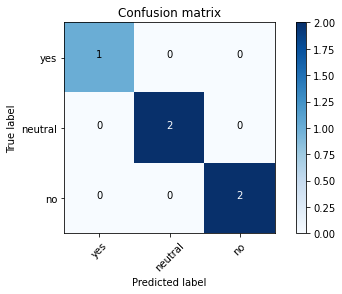

In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

cnf_matrix = confusion_matrix(ytrue, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes','neutral', 'no'],normalize= False,  title='Confusion matrix')

In [50]:
accuracy_score(ytrue, yhat)


1.0

In [51]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
sequence = []
sentence = []
threshold = 0.9
print(type(sequence))


def main2(sequence, sentence, seqLen):
    FIRST_TIME = True
    frame_height, frame_width = (720, 1280)
    source = WebcamSource(width=frame_width, height=frame_height)
    image_size = (frame_width, frame_height)
    count = 0

    # pseudo camera internals
    focal_length = frame_width

    landmarks = None
    smooth_left_depth = -1
    smooth_right_depth = -1
    smooth_factor = 0.1

    with mp_face_mesh.FaceMesh(
        static_image_mode=False,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5,
    ) as face_mesh:
        for idx, (frame, frame_rgb) in enumerate(source):
            results = face_mesh.process(frame_rgb)
            multi_face_landmarks = results.multi_face_landmarks

            if multi_face_landmarks:
                face_landmarks = results.multi_face_landmarks[0]
                landmarks = np.array(
                    [(lm.x, lm.y, lm.z)
                     for lm in face_landmarks.landmark]
                )
                landmarks = landmarks.T

                (
                    left_depth,
                    left_iris_size,
                    left_iris_landmarks,
                    left_eye_contours,
                ) = from_landmarks_to_depth(
                    frame_rgb,
                    landmarks[:, left_eye_landmarks_id],
                    image_size,
                    is_right_eye=False,
                    focal_length=focal_length,
                )

                (
                    right_depth,
                    right_iris_size,
                    right_iris_landmarks,
                    right_eye_contours,
                ) = from_landmarks_to_depth(
                    frame_rgb,
                    landmarks[:, right_eye_landmarks_id],
                    image_size,
                    is_right_eye=True,
                    focal_length=focal_length,
                )
                

                if smooth_right_depth < 0:
                    smooth_right_depth = right_depth
                else:
                    smooth_right_depth = (
                        smooth_right_depth * (1 - smooth_factor)
                        + right_depth * smooth_factor
                    )

                if smooth_left_depth < 0:
                    smooth_left_depth = left_depth
                else:
                    smooth_left_depth = (
                        smooth_left_depth * (1 - smooth_factor)
                        + left_depth * smooth_factor
                    )

            if landmarks is not None:

                landmark_idx = 0
                df_headers = []
                df_values = []

                # add eye contours to dataframe
                eye_landmarks = np.concatenate(
                    [
                        right_eye_contours[0:17],
                        left_eye_contours[0:17],
                    ]
                )

                # add iris landmarks to dataframe
                iris_landmarks = np.concatenate(
                    [
                        right_iris_landmarks,
                        left_iris_landmarks,
                    ]
                )
                for landmark in iris_landmarks:

                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                for landmark in eye_landmarks:

                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                # add subset of facemesh to dataframe
                for ii in POINTS_IDX:

                    landmark = (landmarks[0, ii],
                                landmarks[1, ii], landmarks[2, ii])
                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                 # Export to CSV
#                         with open(outputfilepath, mode='a', newline='') as f:
#                             csv_writer = csv.writer(
#                                 f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                             if (FIRST_TIME):
#                                 csv_writer.writerow(df_headers)
#                                 FIRST_TIME = False
#                             csv_writer.writerow(df_values)

                # draw subset of facemesh
                for ii in POINTS_IDX:
                    pos = (np.array(image_size) *
                           landmarks[:2, ii]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), LARGE_CIRCLE_SIZE, GREEN, -1)

                # draw eye contours
                eye_landmarks = np.concatenate(
                    [
                        right_eye_contours[0:17],
                        left_eye_contours[0:17],
                    ]
                )
                for landmark in eye_landmarks:
                    pos = (np.array(image_size) *
                           landmark[:2]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), SMALL_CIRCLE_SIZE, RED, -1)

                # draw iris landmarks
                iris_landmarks = np.concatenate(
                    [
                        right_iris_landmarks[0:3],
                        left_iris_landmarks[0:5],
                    ]
                )
                for landmark in iris_landmarks:
                    pos = (np.array(image_size) *
                           landmark[:2]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), SMALL_CIRCLE_SIZE, YELLOW, -1)

                # write depth values into frame
                depth_string = "{:.2f}cm, {:.2f}cm".format(
                    smooth_left_depth / 10, smooth_right_depth / 10
                )
                frame = cv2.putText(
                    frame,
                    depth_string,
                    (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,
                    GREEN,
                    2,
                    cv2.LINE_AA,
                )
                
                keyLandmarks = np.array(df_values)
                
                keypoints = compareIrisLandmarks(keyLandmarks[15:30], keyLandmarks[81:132], keyLandmarks[132:138]) + compareIrisLandmarks(keyLandmarks[0:15], keyLandmarks[30:81], keyLandmarks[138:])
#                 keypoints = compareMidPointToLandMarks(df_values[0:3], df_values[132:])
                sequence.append(keypoints)
                sequence = sequence[-seqLen:]
                if len(sequence) == seqLen:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(res)

                    #3. Viz logic
                    if res[np.argmax(res)] > threshold: 
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                    if len(sentence) > 5: 
                        sentence = sentence[-5:]

                    # Viz probabilities
                    frame = prob_viz(res, actions, frame, colors)
                    source.show(frame)


<class 'list'>


In [55]:
s= []
s1 = []
main2(s, s1, 48)

[1.63e-04 1.00e+00 3.41e-13]
[3.41e-04 1.00e+00 2.31e-12]
[7.67e-04 9.99e-01 1.85e-11]
[1.58e-03 9.98e-01 1.30e-10]
[2.86e-03 9.97e-01 7.34e-10]
[4.86e-03 9.95e-01 3.47e-09]
[7.42e-03 9.93e-01 1.27e-08]
[1.11e-02 9.89e-01 4.67e-08]
[1.51e-02 9.85e-01 1.32e-07]
[1.83e-02 9.82e-01 2.65e-07]
[2.60e-02 9.74e-01 9.01e-07]
[3.09e-02 9.69e-01 1.65e-06]
[3.57e-02 9.64e-01 2.87e-06]
[3.78e-02 9.62e-01 3.82e-06]
[3.45e-02 9.66e-01 3.41e-06]
[3.09e-02 9.69e-01 2.91e-06]
[3.02e-02 9.70e-01 3.45e-06]
[2.47e-02 9.75e-01 2.31e-06]
[2.43e-02 9.76e-01 2.58e-06]
[2.57e-02 9.74e-01 3.36e-06]
[2.15e-02 9.79e-01 2.33e-06]
[1.94e-02 9.81e-01 1.87e-06]
[1.61e-02 9.84e-01 1.34e-06]
[1.37e-02 9.86e-01 1.06e-06]
[9.24e-03 9.91e-01 4.40e-07]
[7.81e-03 9.92e-01 3.48e-07]
[6.54e-03 9.93e-01 2.65e-07]
[4.92e-03 9.95e-01 1.54e-07]
[3.55e-03 9.96e-01 8.27e-08]
[2.72e-03 9.97e-01 4.80e-08]
[1.95e-03 9.98e-01 2.71e-08]
[1.18e-03 9.99e-01 9.67e-09]
[6.25e-04 9.99e-01 2.50e-09]
[3.32e-04 1.00e+00 6.21e-10]
[1.55e-04 1.00

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1.01e-37 1.00e+00 0.00e+00]
[2.06e-34 1.00e+00 0.00e+00]
[6.72e-34 1.00e+00 0.00e+00]
[5.96e-30 1.00e+00 0.00e+00]
[5.06e-29 1.00e+00 0.00e+00]
[3.2e-27 1.0e+00 0.0e+00]
[1.84e-27 1.00e+00 0.00e+00]
[8.43e-27 1.00e+00 0.00e+00]
[9.61e-27 1.00e+00 0.00e+00]
[6.89e-24 1.00e+00 0.00e+00]
[1.82e-24 1.00e+00 0.00e+00]
[8.11e-23 1.00e+00 0.00e+00]
[1.82e-22 1.00e+00 0.00e+00]
[1.44e-21 1.00e+00 0.00e+00]
[5.23e-21 1.00e+00 0.00e+00]
[4.83e-19 1.00e+00 0.00e+00]
[1.52e-17 1.00e+00 0.00e+00]
[9.37e-18 1.00e+00 0.00e+00]
[2.61e-16 1.00e+00 2.71e-38]
[5.36e-15 1.00e+00 4.23e-35]
[8.43e-13 1.00e+00 3.09e-30]
[4.17e-10 1.00e+00 8.29e-24]
[6.01e-09 1.00e+00 6.55e-21]
[2.74e-07 1.00e+00 5.98e-17]
[1.40e-06 1.00e+00 3.42e-15]
[6.51e-06 1.00e+00 1.35e-13]
[1.48e-05 1.00e+00 8.41e-13]
[4.17e-05 1.00e+00 8.16e-12]
[4.80e-05 1.00e+00 1.14e-11]
[5.02e-05 1.00e+00 1.16e-11]
[3.38e-05 1.00e+00 4.68e-12]
[2.08e-05 1.00e+

[0.55 0.4  0.05]
[0.55 0.41 0.04]
[0.54 0.43 0.04]
[0.53 0.44 0.03]
[0.52 0.45 0.03]
[0.52 0.46 0.02]
[0.52 0.45 0.02]
[0.53 0.45 0.02]
[0.53 0.45 0.02]
[0.53 0.45 0.02]
[0.54 0.45 0.02]
[0.55 0.43 0.02]
[0.56 0.42 0.02]
[0.57 0.41 0.02]
[0.59 0.39 0.02]
[0.61 0.36 0.03]
[0.62 0.35 0.03]
[0.64 0.33 0.03]
[0.64 0.33 0.03]
[0.64 0.33 0.04]
[0.64 0.32 0.04]
[0.64 0.32 0.04]
[0.63 0.32 0.04]
[0.64 0.31 0.05]
[0.64 0.3  0.06]
[0.64 0.3  0.06]
[0.64 0.28 0.08]
[0.64 0.28 0.09]
[0.63 0.27 0.1 ]
[0.63 0.26 0.12]
[0.62 0.25 0.14]
[0.61 0.24 0.16]
[0.6  0.23 0.17]
[0.58 0.22 0.19]
[0.57 0.21 0.22]
[0.55 0.2  0.25]
[0.54 0.19 0.27]
[0.53 0.18 0.29]
[0.51 0.17 0.33]
[0.49 0.16 0.36]
[0.48 0.15 0.38]
[0.46 0.14 0.4 ]
[0.45 0.13 0.42]
[0.43 0.12 0.44]
[0.42 0.12 0.46]
[0.41 0.11 0.48]
[0.4  0.11 0.49]
[0.39 0.1  0.51]
[0.38 0.1  0.52]
[0.37 0.1  0.54]
[0.36 0.09 0.55]
[0.35 0.09 0.56]
[0.35 0.09 0.56]
[0.35 0.09 0.57]
[0.34 0.08 0.57]
[0.34 0.08 0.58]
[0.33 0.08 0.59]
[0.33 0.08 0.59]
[0.33 0.08 0.6

[1.41e-08 1.00e+00 6.91e-24]
[1.61e-08 1.00e+00 8.06e-24]
[6.80e-08 1.00e+00 2.64e-22]
[1.69e-07 1.00e+00 2.30e-21]
[2.64e-07 1.00e+00 5.80e-21]
[4.90e-07 1.00e+00 2.63e-20]
[9.51e-07 1.00e+00 1.20e-19]
[1.51e-06 1.00e+00 3.49e-19]
[2.32e-06 1.00e+00 9.04e-19]
[3.72e-06 1.00e+00 2.66e-18]
[2.58e-06 1.00e+00 8.97e-19]
[9.01e-07 1.00e+00 4.66e-20]
[1.07e-06 1.00e+00 6.25e-20]
[1.21e-06 1.00e+00 7.36e-20]
[1.39e-06 1.00e+00 1.03e-19]
[1.71e-06 1.00e+00 1.71e-19]
[3.20e-06 1.00e+00 9.03e-19]
[4.66e-06 1.00e+00 2.64e-18]
[1.14e-05 1.00e+00 2.80e-17]
[2.66e-05 1.00e+00 2.89e-16]
[4.43e-05 1.00e+00 1.15e-15]
[8.23e-05 1.00e+00 6.23e-15]
[1.45e-04 1.00e+00 2.86e-14]
[2.63e-04 1.00e+00 1.44e-13]
[6.06e-04 9.99e-01 1.45e-12]
[1.16e-03 9.99e-01 8.35e-12]
[1.81e-03 9.98e-01 2.86e-11]
[2.69e-03 9.97e-01 7.67e-11]
[3.98e-03 9.96e-01 2.07e-10]
[5.67e-03 9.94e-01 5.21e-10]
[7.06e-03 9.93e-01 9.54e-10]
[1.03e-02 9.90e-01 2.53e-09]
[1.48e-02 9.85e-01 6.63e-09]
[1.95e-02 9.80e-01 1.37e-08]
[2.84e-02 9.72

[1.30e-02 9.87e-01 4.95e-07]
[9.36e-03 9.91e-01 1.94e-07]
[6.14e-03 9.94e-01 6.05e-08]
[4.53e-03 9.95e-01 2.54e-08]
[3.23e-03 9.97e-01 9.66e-09]
[2.29e-03 9.98e-01 3.54e-09]
[1.74e-03 9.98e-01 1.57e-09]
[1.30e-03 9.99e-01 6.48e-10]
[9.20e-04 9.99e-01 2.31e-10]
[7.65e-04 9.99e-01 1.25e-10]
[6.41e-04 9.99e-01 6.75e-11]
[5.49e-04 9.99e-01 3.78e-11]
[4.97e-04 1.00e+00 2.37e-11]
[4.76e-04 1.00e+00 1.79e-11]
[4.94e-04 1.00e+00 1.68e-11]
[4.50e-04 1.00e+00 1.09e-11]
[5.37e-04 9.99e-01 1.37e-11]
[6.25e-04 9.99e-01 1.63e-11]
[7.88e-04 9.99e-01 2.42e-11]
[1.01e-03 9.99e-01 3.81e-11]
[1.23e-03 9.99e-01 5.37e-11]
[1.53e-03 9.98e-01 7.58e-11]
[1.79e-03 9.98e-01 9.37e-11]
[2.00e-03 9.98e-01 1.01e-10]
[2.51e-03 9.97e-01 1.60e-10]
[2.79e-03 9.97e-01 1.87e-10]
[3.31e-03 9.97e-01 2.58e-10]
[4.08e-03 9.96e-01 3.79e-10]
[4.75e-03 9.95e-01 4.64e-10]
[5.99e-03 9.94e-01 7.27e-10]
[6.31e-03 9.94e-01 7.13e-10]
[8.22e-03 9.92e-01 1.24e-09]
[1.23e-02 9.88e-01 3.27e-09]
[1.61e-02 9.84e-01 6.04e-09]
[2.20e-02 9.78

KeyboardInterrupt: 

In [47]:
s= []
s1 = []
main2(s, s1)

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
no
yes
yes
no
yes
yes
yes
yes
yes
no
yes
yes
no
yes
yes
yes
no
yes
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
